## Similarity Measurement
1. <b>Cosie distance:</b> It determines the cosine of the angle between the point vectors of the two points in the n-dimensional space<br><br>
$d = \frac{X.Y}{||X||*||Y||}$  
<br><br>

2. <b>Manhattan distance:</b> It computes the sum of the absolute differences between the coordinates of the two data points.<br><br>
$d = \sum_{n} |X{_{i}}-Y{_{i}}|  $   
<br><br> 

3. <b>Eclidian distance:</b> It is also known as the generalized distance metric. It can be used for both ordinal and quantitative variables<br><br>
$d = (\sum _{n}|X_{i}-Y_{i}|^{2})^{\frac{1}{2}}$

## Agglomerative Hierarchical Clustering
- Agglomerative clustering works in a "bottom-up" manner
- Tt first treat each object as a singleton cluster
- At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes)
- We keep repeating the previous steps till reaching one node

How to measure the distance between clusters?<br>
- <b>Single Linkage: </b> This is the distance between the closest members of the two clusters
- <b>Complete Linkage: </b> the distance between the farthest apart
- <b>Average Linkage: </b> this method involves looking at the distance between 

After reaching one cluster how to obtain n-clusters?<br/>
- Each intermediate step provides a clustering of the data
- The last step provide 1 cluster, the step before last provides 2 clusters and so on

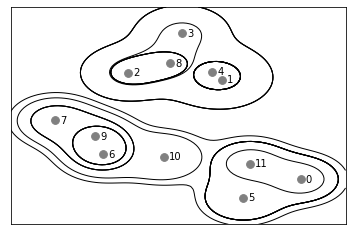

In [2]:
import mglearn
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Feature 1')

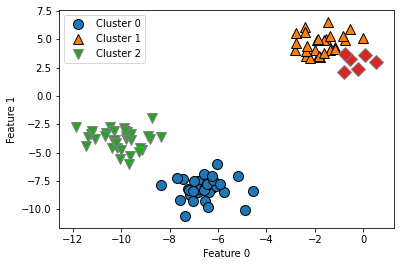

In [22]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=4)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Kmeans Clustering

1. At first intiate scatered k (the number of clusters) 
2. (Re-)assign each data point to its nearest centroid, by calculating the euclidian distance between all points to all centroids.
3. Calculate the mean for each centroid based on all respective data points and move the centroid in the middle of all his assigned data points.
4. Go to 1) until the convergence criterion is fulfilled. In my case, I calculate the within-cluster distance between all points to the re-assigned centroid mean. After a new iteration, if all centroids together moved less than 0.01, so basically nothing happens anymore, the convergence criterion is performed


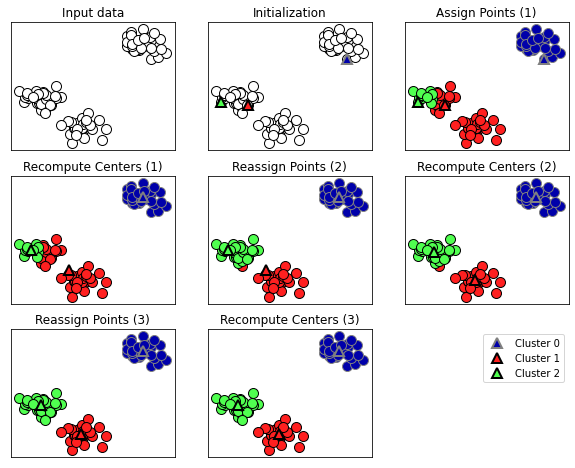

In [2]:
import mglearn.plots

mglearn.plots.plot_kmeans_algorithm()

Text(0, 0.5, 'Feature 1')

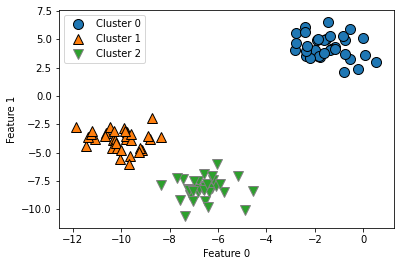

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
assignment = kmeans.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Notes:
- The initialization for the centroids plays a HUGE role of how the K-Means will perform. Imagine two of the centroid start in the most left and lowest position. Every data point will be assigned to centroid number one and the clustering is useless.

- Notice: K-Means is only locally optimal and there is no guarantee for a global minima

<h3>But how do you know that you are choosing the best number of clusters?</h3>

### Number of Clusters Evaluation

#### Elbow method:
<b>Within-cluster variance:</b> is a measure of compactness of the cluster. Lower the value of within cluster variance, higher the compactness of cluster formed.

<b>Sum of within-cluster variance: </b>, W, is calculated for clustering analyses done with different values of k. W is a cumulative measure how good the points are clustered in the analysis. Plotting the k values and their corresponding sum of within-cluster variance helps in finding the number of clusters.

#### Silhouette Coefficient
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way

<center><img src="images/SilhouetteCoefficient.jpeg"></img></center>

$Silhouette Score = (b-a)/max(a,b)$

where

$a$= average intra-cluster distance i.e the average distance between each point within a cluster.

$b$= average inter-cluster distance i.e the average distance between all clusters.

Ref: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

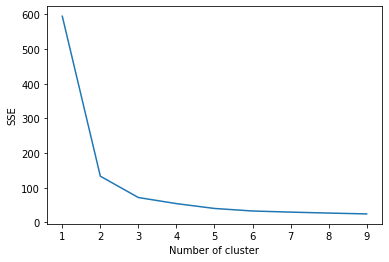

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

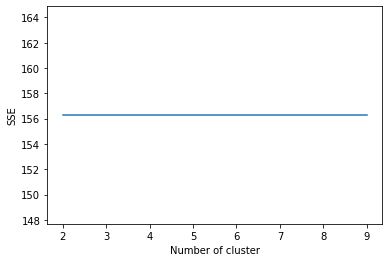

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    assignment = kmeans.fit_predict(X)
    sse[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

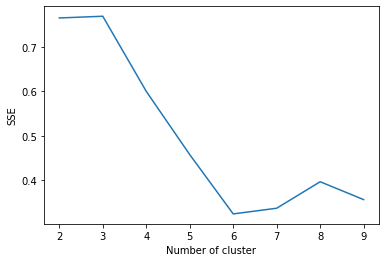

In [17]:
import imp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

sse = {}
sc = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    sc[k] = silhouette_score(X, kmeans.labels_)
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- Using metrics like elbow and sillhout usually only helps in developing algorithms
- Not in assessing success in an application
- Specially according to these metrics and scores, we still don’t know if there is any semantic meaning in the clustering
- The only way to know whether the clustering corresponds to anything we are interested in is to analyze the clusters manually


## Assignment#1

For the following data set perform clustering
https://archive.ics.uci.edu/ml/datasets/Bag+of+Words<br>
<b>before starting in the task try to intially estimate the probable number of clusters</b>

## Assignment#2
perform customer segmentation on the following data-set<br>
https://www.kaggle.com/datasets/dev0914sharma/customer-clustering